In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import re
import nltk
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import LancasterStemmer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
df=pd.read_csv('/content/drive/MyDrive/train_data.txt',sep=':::',header=None)

<ipython-input-46-1ca5f4971177>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv('/content/drive/MyDrive/train_data.txt',sep=':::',header=None)


In [47]:
df.drop(0,axis=1,inplace=True)
df.rename({1:'Movie',2:'Genre',3:'Description'},axis=1,inplace=True)

In [48]:
df.head()

,Movie,Genre,Description
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [49]:
df.shape

(54214, 3)

54214 rows and 3 columns

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


All colmns are of object type

In [51]:
df.describe()

,Movie,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [52]:
df.isnull().sum()

Movie          0
Genre          0
Description    0
dtype: int64

No null values in the dataset

In [53]:
df.drop_duplicates().shape

(54214, 3)

There are no duplicate rows in the dataset

### Data Analysis

In [54]:
df['Genre'].nunique()

27

there are 27 unique genre in the dataset

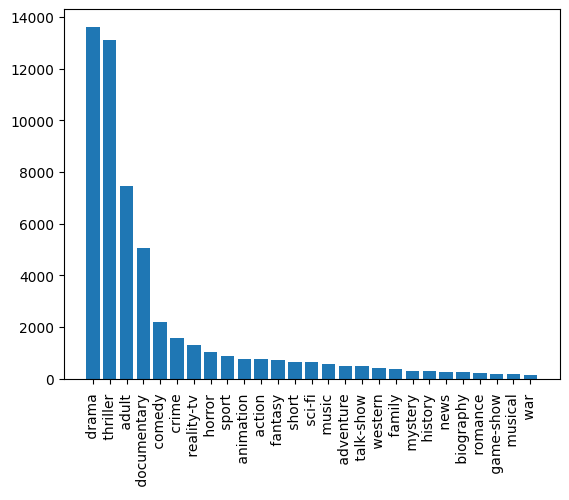

In [55]:
plt.bar(df['Genre'].unique(),df['Genre'].value_counts())
plt.xticks(rotation=90)
plt.show()

We can observe that drama and documentry genre have the highest count in the dataset

In [56]:
df[df['Genre']==' drama ']['Movie']

0         Oscar et la dame rose (2009) 
3                The Secret Sin (1915) 
4               The Unrecovered (2007) 
11              In the Gloaming (1997) 
14          The Glass Menagerie (1973) 
                      ...              
54196            Vulture Canyon (????) 
54197               The Burglar (2016) 
54198             Dervis i smrt (1974) 
54200           The Judas Horse (????) 
54207                   Kaçamak (1988) 
Name: Movie, Length: 13613, dtype: object

there are 13613 movies with genre of drama

In [57]:
df[df['Genre']==' documentary ']['Movie']

5                                  Quality Control (2011) 
10                         The Spirit World: Ghana (2016) 
12                    Pink Ribbons: One Small Step (2009) 
17        "Wo Grafen schlafen - Eine Schlösser-Reise" (...
29                              Cracked Not Broken (2007) 
                               ...                        
54185                            Grazhdaninat Kino (2014) 
54195          Segregating the Greatest Generation (2006) 
54202     Buon Fresco Foundations: Fresco Pigments and ...
54205                               Counting Sheep (2004) 
54211           Ronald Goedemondt: Ze bestaan echt (2008) 
Name: Movie, Length: 13096, dtype: object

there are 13096 movies with genre of documantary

In [58]:
num_words=df['Description'].apply(lambda x:len(nltk.word_tokenize(x)))

In [59]:
num_words.mean()

115.81012284649721

so there are ~116 words of description on average for each movie

<Axes: xlabel='Description', ylabel='Count'>

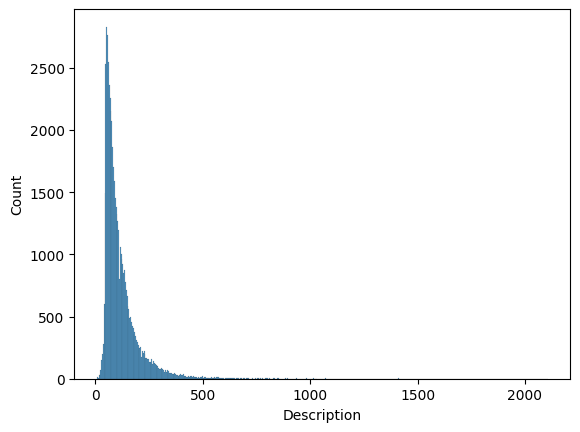

In [60]:
sns.histplot(num_words)

### Text PreProcessing

In [61]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = "".join([i for i in text if i not in string.punctuation])

    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text


df['Description'] = df['Description'].apply(clean_text)

In [62]:
df.head()

,Movie,Genre,Description
0,Oscar et la dame rose (2009),drama,listening conversation doctor parents year old...
1,Cupid (1997),thriller,brother sister past incestuous relationship cu...
2,"Young, Wild and Wonderful (1980)",adult,bus empties students field trip museum natural...
3,The Secret Sin (1915),drama,help unemployed father make ends meet edith tw...
4,The Unrecovered (2007),drama,films title refers recovered bodies ground zer...


###TFIDF

In [63]:
tfidf_vectorizer = TfidfVectorizer()
x_train = tfidf_vectorizer.fit_transform(df['Description'])

In [64]:
le=LabelEncoder()
le.fit(df['Genre'])

df['Genre']=le.transform(df['Genre'])

In [65]:
X=x_train
Y=df['Genre']

x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=43)

###Model Training

####Multinimial Naive Bayes

In [66]:
classifier_mn = MultinomialNB()
classifier_mn.fit(x_train, y_train)
y_pred = classifier_mn.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)

print("Validation Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Validation Accuracy: 0.4417146229895234
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       336
           1       0.00      0.00      0.00       152
           2       0.00      0.00      0.00       213
           3       0.00      0.00      0.00       114
           4       0.00      0.00      0.00        71
           5       0.69      0.03      0.06      1904
           6       0.00      0.00      0.00       147
           7       0.54      0.89      0.67      3291
           8       0.37      0.89      0.53      3356
           9       0.00      0.00      0.00       190
          10       0.00      0.00      0.00        78
          11       0.00      0.00      0.00        52
          12       0.00      0.00      0.00        65
          13       0.00      0.00      0.00       552
          14       0.00      0.00      0.00       175
          15       0.00      0.00      0.00        73
          16       0.00      0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Random Forest Classifier

In [67]:
classifier_rf = RandomForestClassifier()
classifier_rf.fit(x_train, y_train)
y_pred = classifier_rf.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)

print("Validation Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Validation Accuracy: 0.4823668289803748
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       336
           1       0.57      0.05      0.10       152
           2       0.67      0.06      0.10       213
           3       0.00      0.00      0.00       114
           4       0.00      0.00      0.00        71
           5       0.59      0.24      0.34      1904
           6       1.00      0.01      0.01       147
           7       0.54      0.89      0.67      3291
           8       0.41      0.85      0.55      3356
           9       0.80      0.02      0.04       190
          10       0.00      0.00      0.00        78
          11       0.95      0.38      0.55        52
          12       0.00      0.00      0.00        65
          13       0.78      0.11      0.20       552
          14       0.74      0.10      0.17       175
          15       0.00      0.00      0.00        73
          16       0.00      0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Logistic Regression

In [68]:
classifier_lr = LogisticRegression()
classifier_lr.fit(x_train, y_train)
y_pred = classifier_lr.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)

print("Validation Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Validation Accuracy: 0.5774679061531651
              precision    recall  f1-score   support

           0       0.57      0.21      0.31       336
           1       0.64      0.24      0.35       152
           2       0.68      0.10      0.17       213
           3       0.57      0.04      0.07       114
           4       0.00      0.00      0.00        71
           5       0.56      0.60      0.57      1904
           6       1.00      0.01      0.01       147
           7       0.64      0.87      0.74      3291
           8       0.52      0.80      0.63      3356
           9       0.50      0.05      0.09       190
          10       0.00      0.00      0.00        78
          11       0.95      0.37      0.53        52
          12       0.00      0.00      0.00        65
          13       0.72      0.52      0.61       552
          14       0.75      0.36      0.49       175
          15       0.00      0.00      0.00        73
          16       0.00      0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [70]:
import pickle

In [71]:
pickle.dump(classifier_lr,open('model_movie_genre','wb'))

In [73]:
pickle.dump(tfidf_vectorizer,open('tfidf_movie_genre','wb'))